In [1]:
import pandas as pd
from scipy import stats

In [2]:
df_1 = pd.read_csv("../../dataset/pompa-3-27.csv")
print(len(df_1))

44491


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

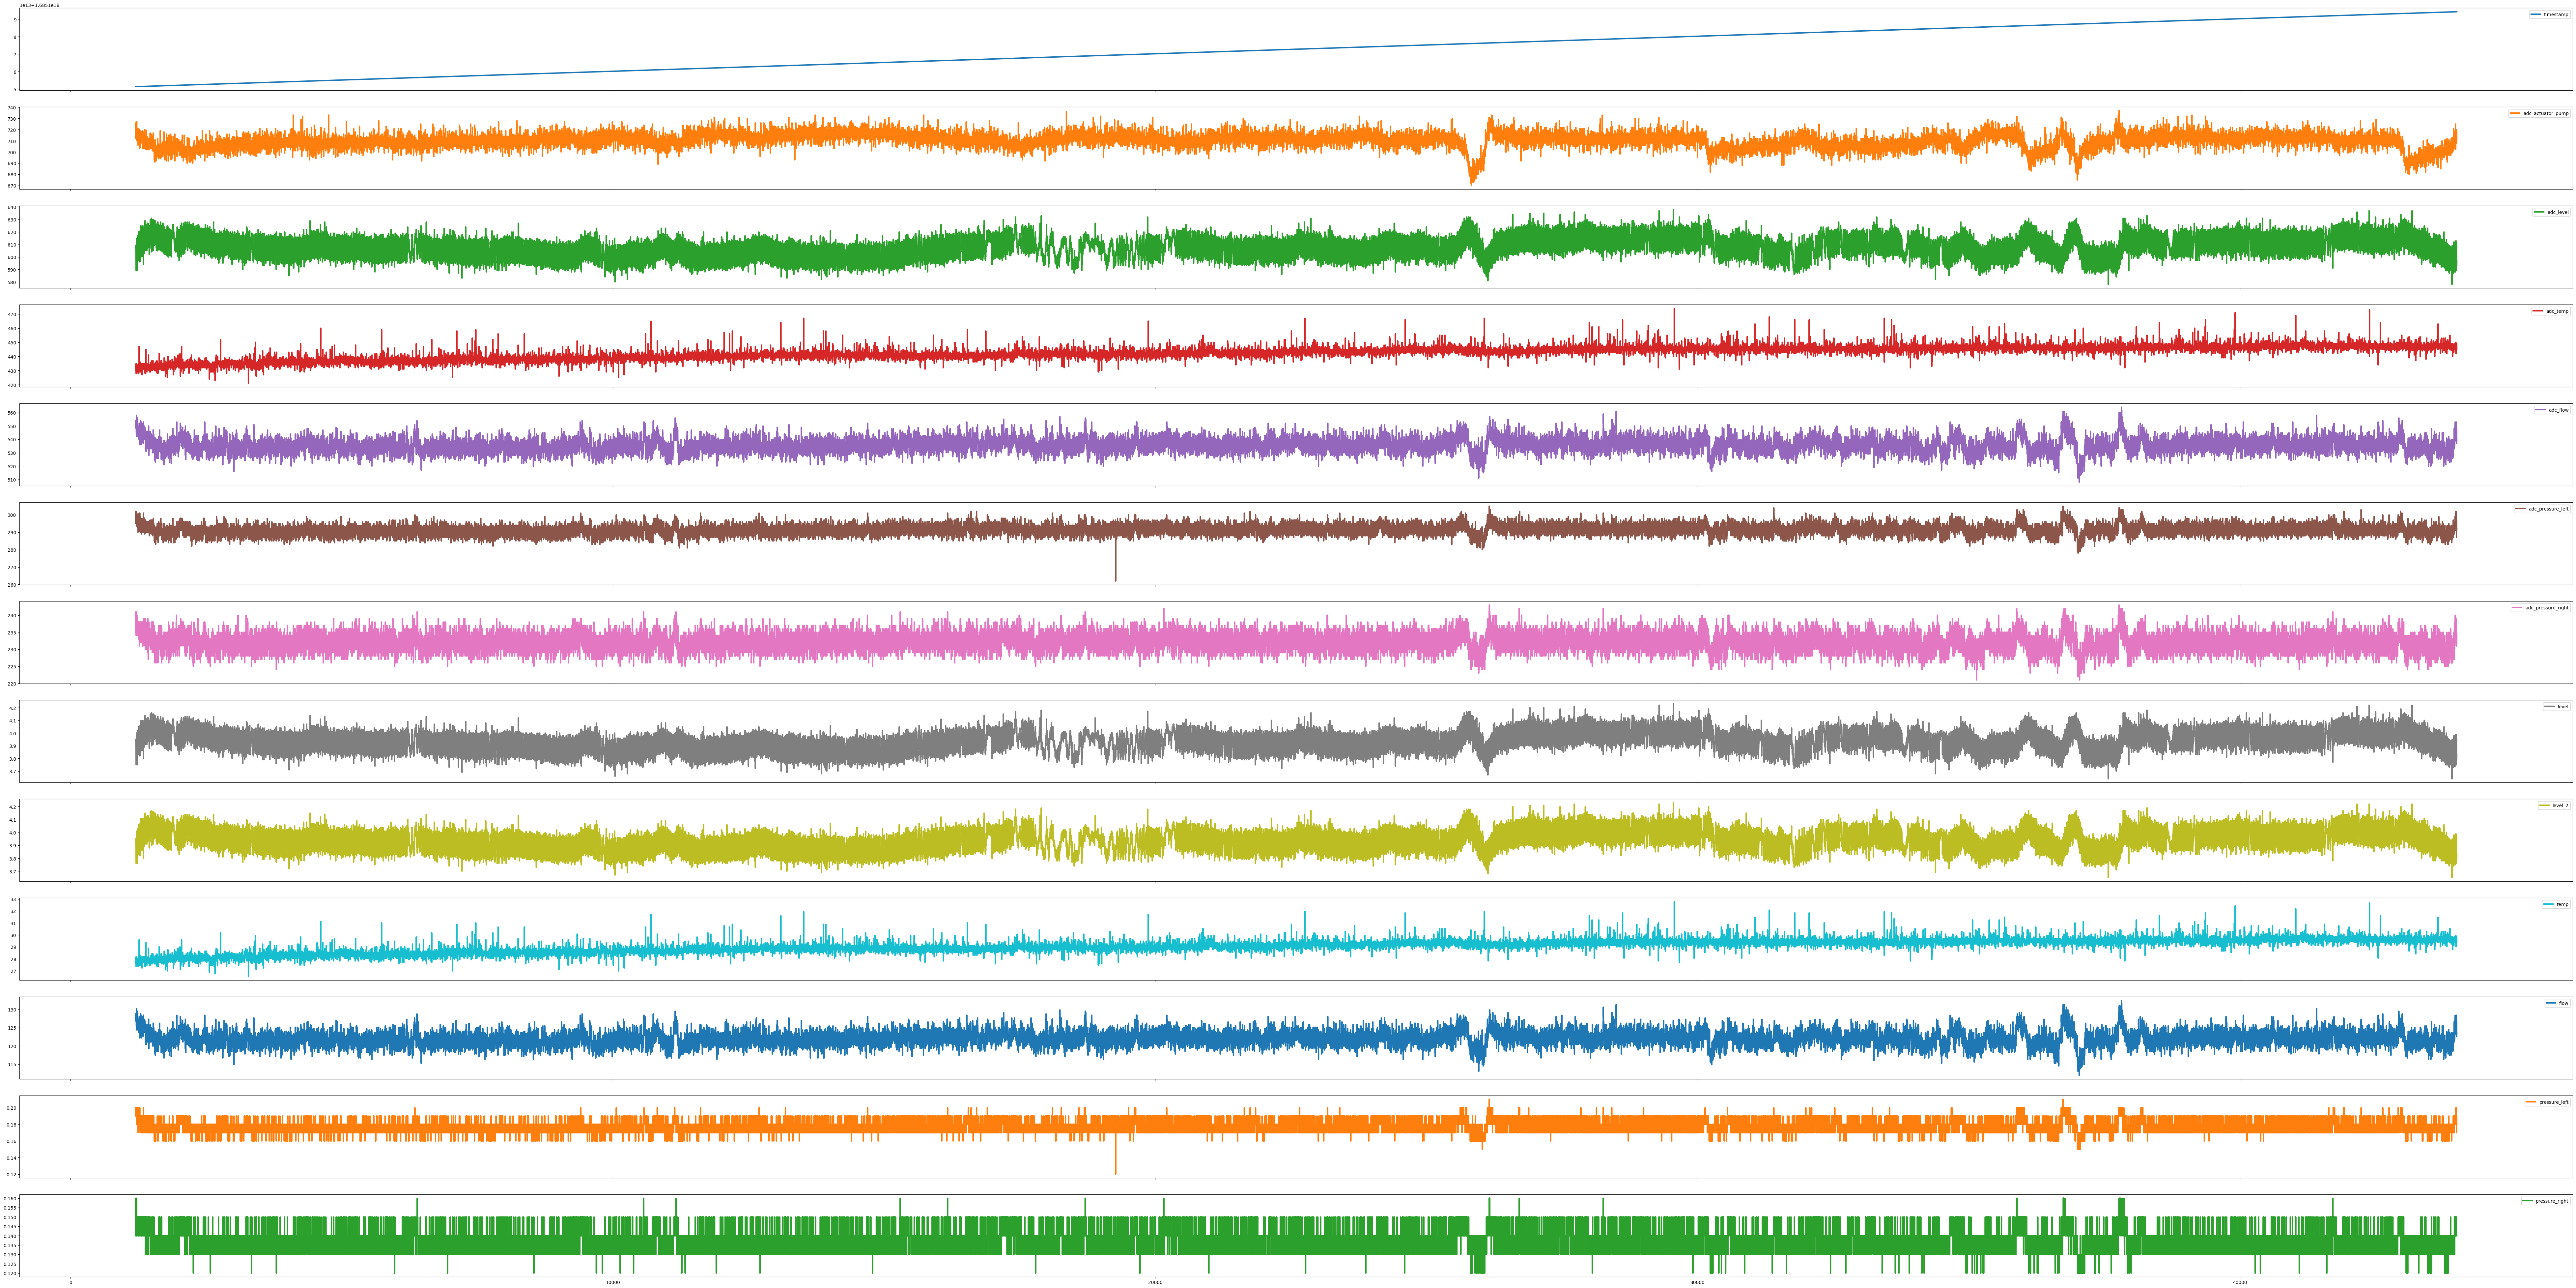

In [3]:
df_1[1200:44000].plot(subplots=True, figsize=(100, 50), linewidth=3)

In [4]:
df_2 = pd.read_csv("../../dataset/pompa-3-28.csv")
print(len(df_2))

41260


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

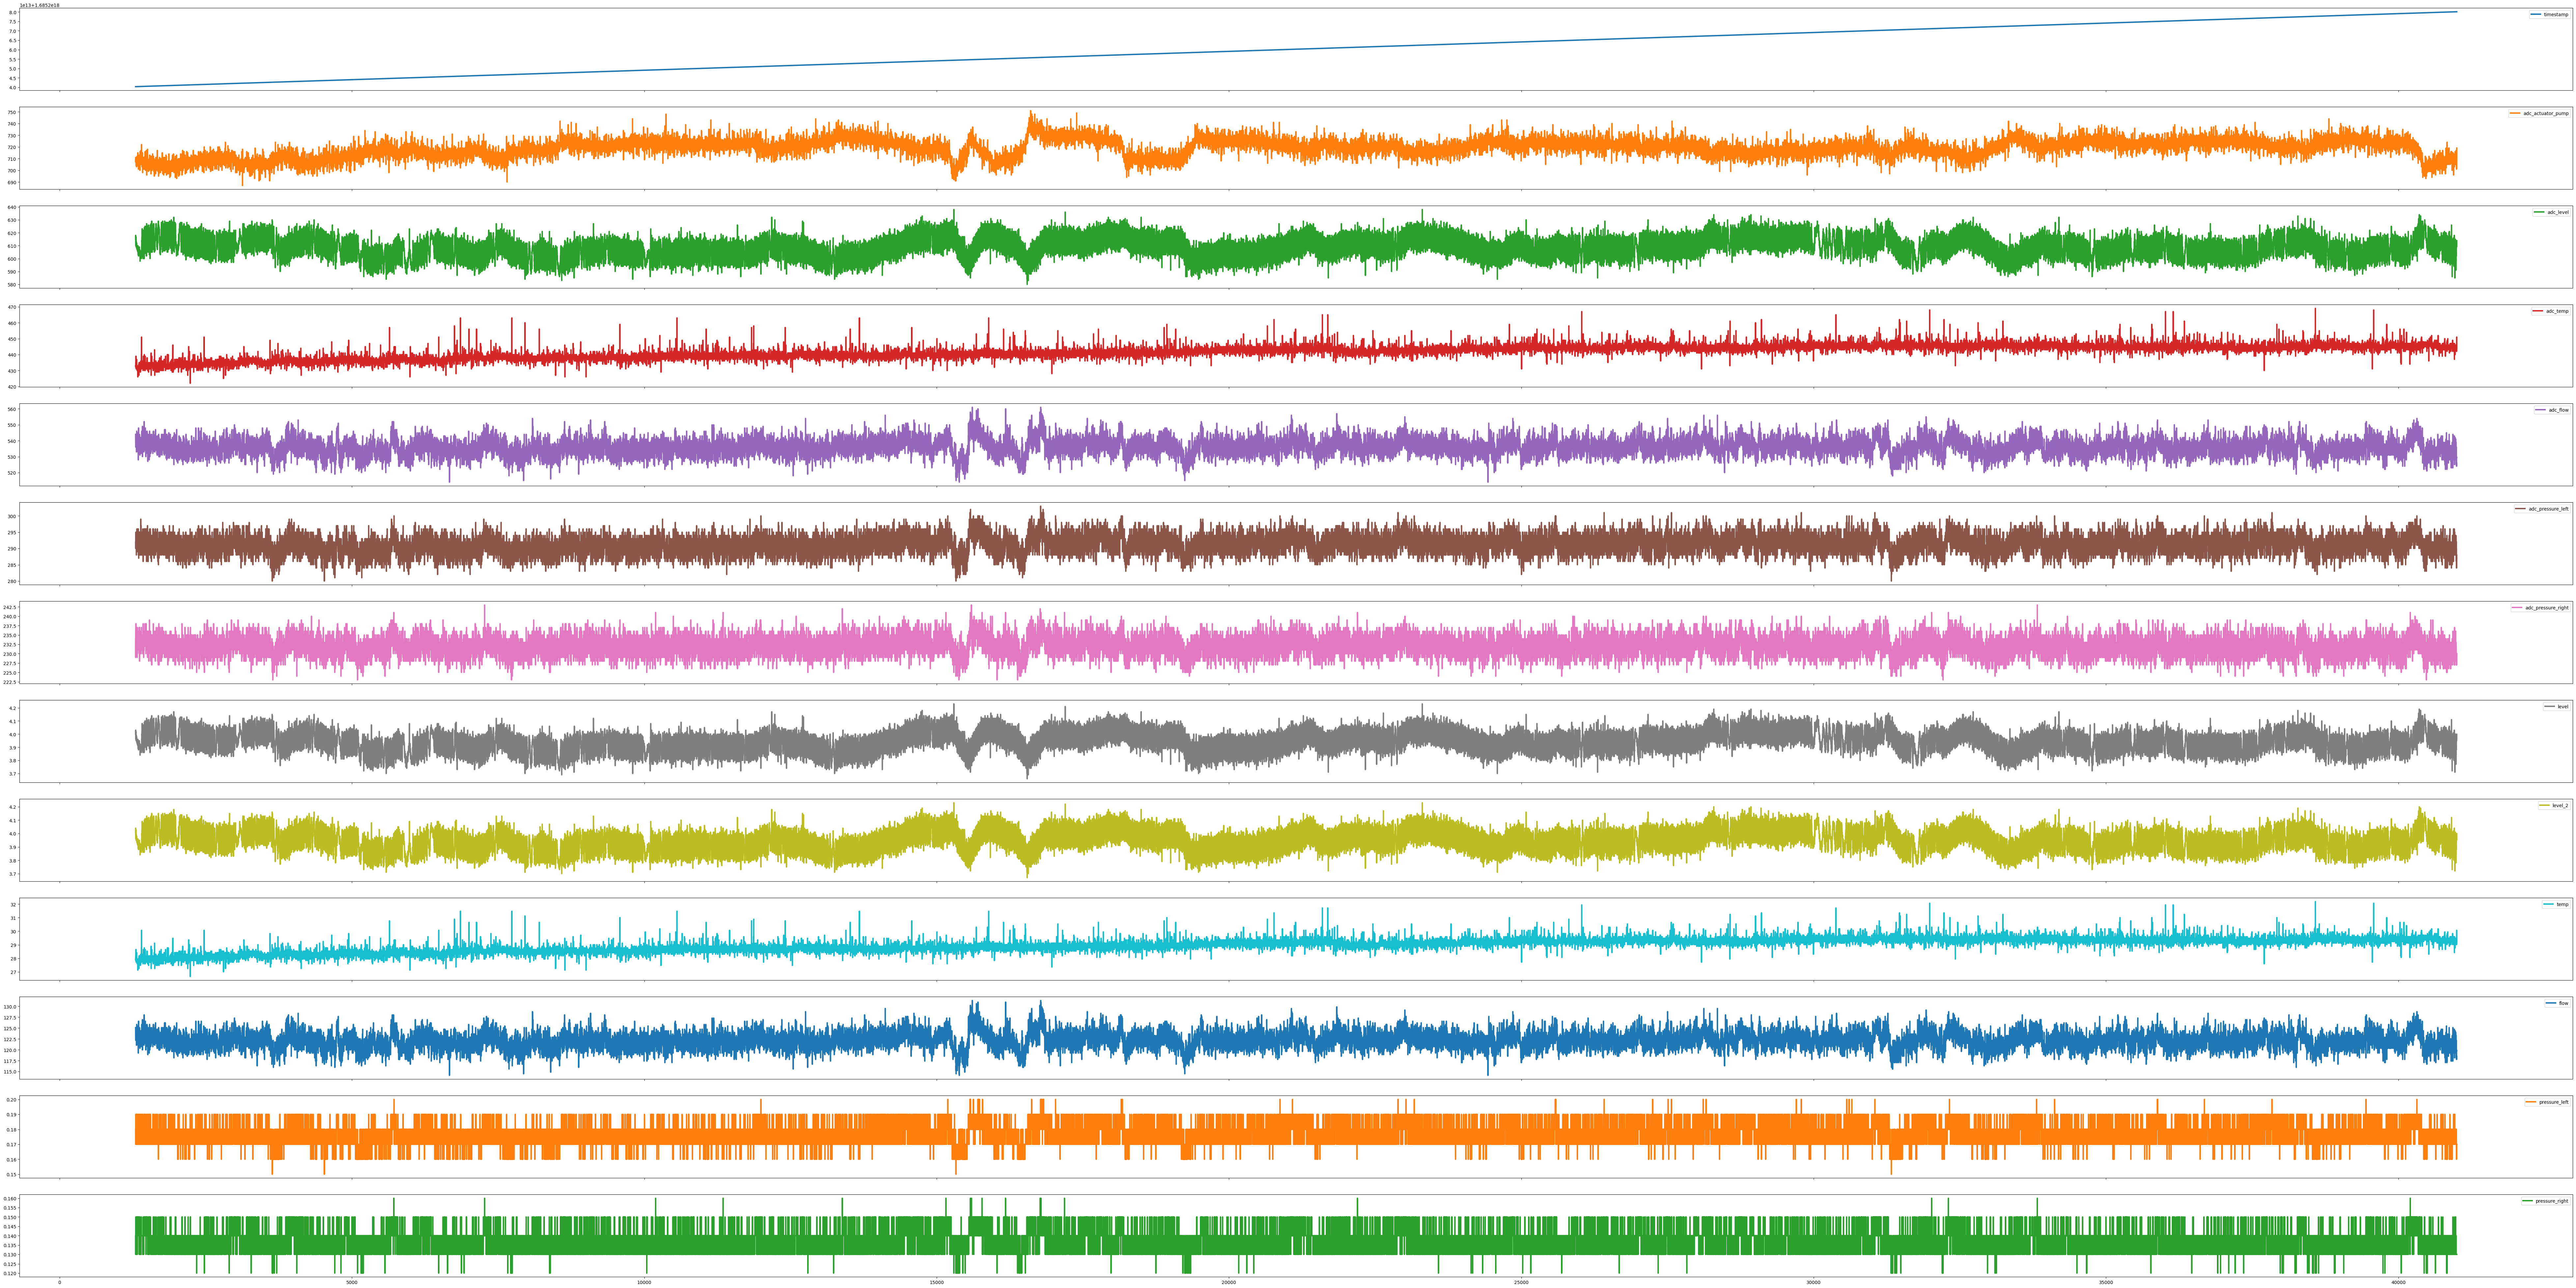

In [5]:
df_2[1300:41000].plot(subplots=True, figsize=(100, 50), linewidth=3)

In [6]:
new_df = pd.concat([df_1[1200:44000], df_2[1300:41000]], axis=0, ignore_index=True)
print(len(new_df))
# new_df = pd.read_csv("../../dataset/pompa-train-v2.csv")

82500


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

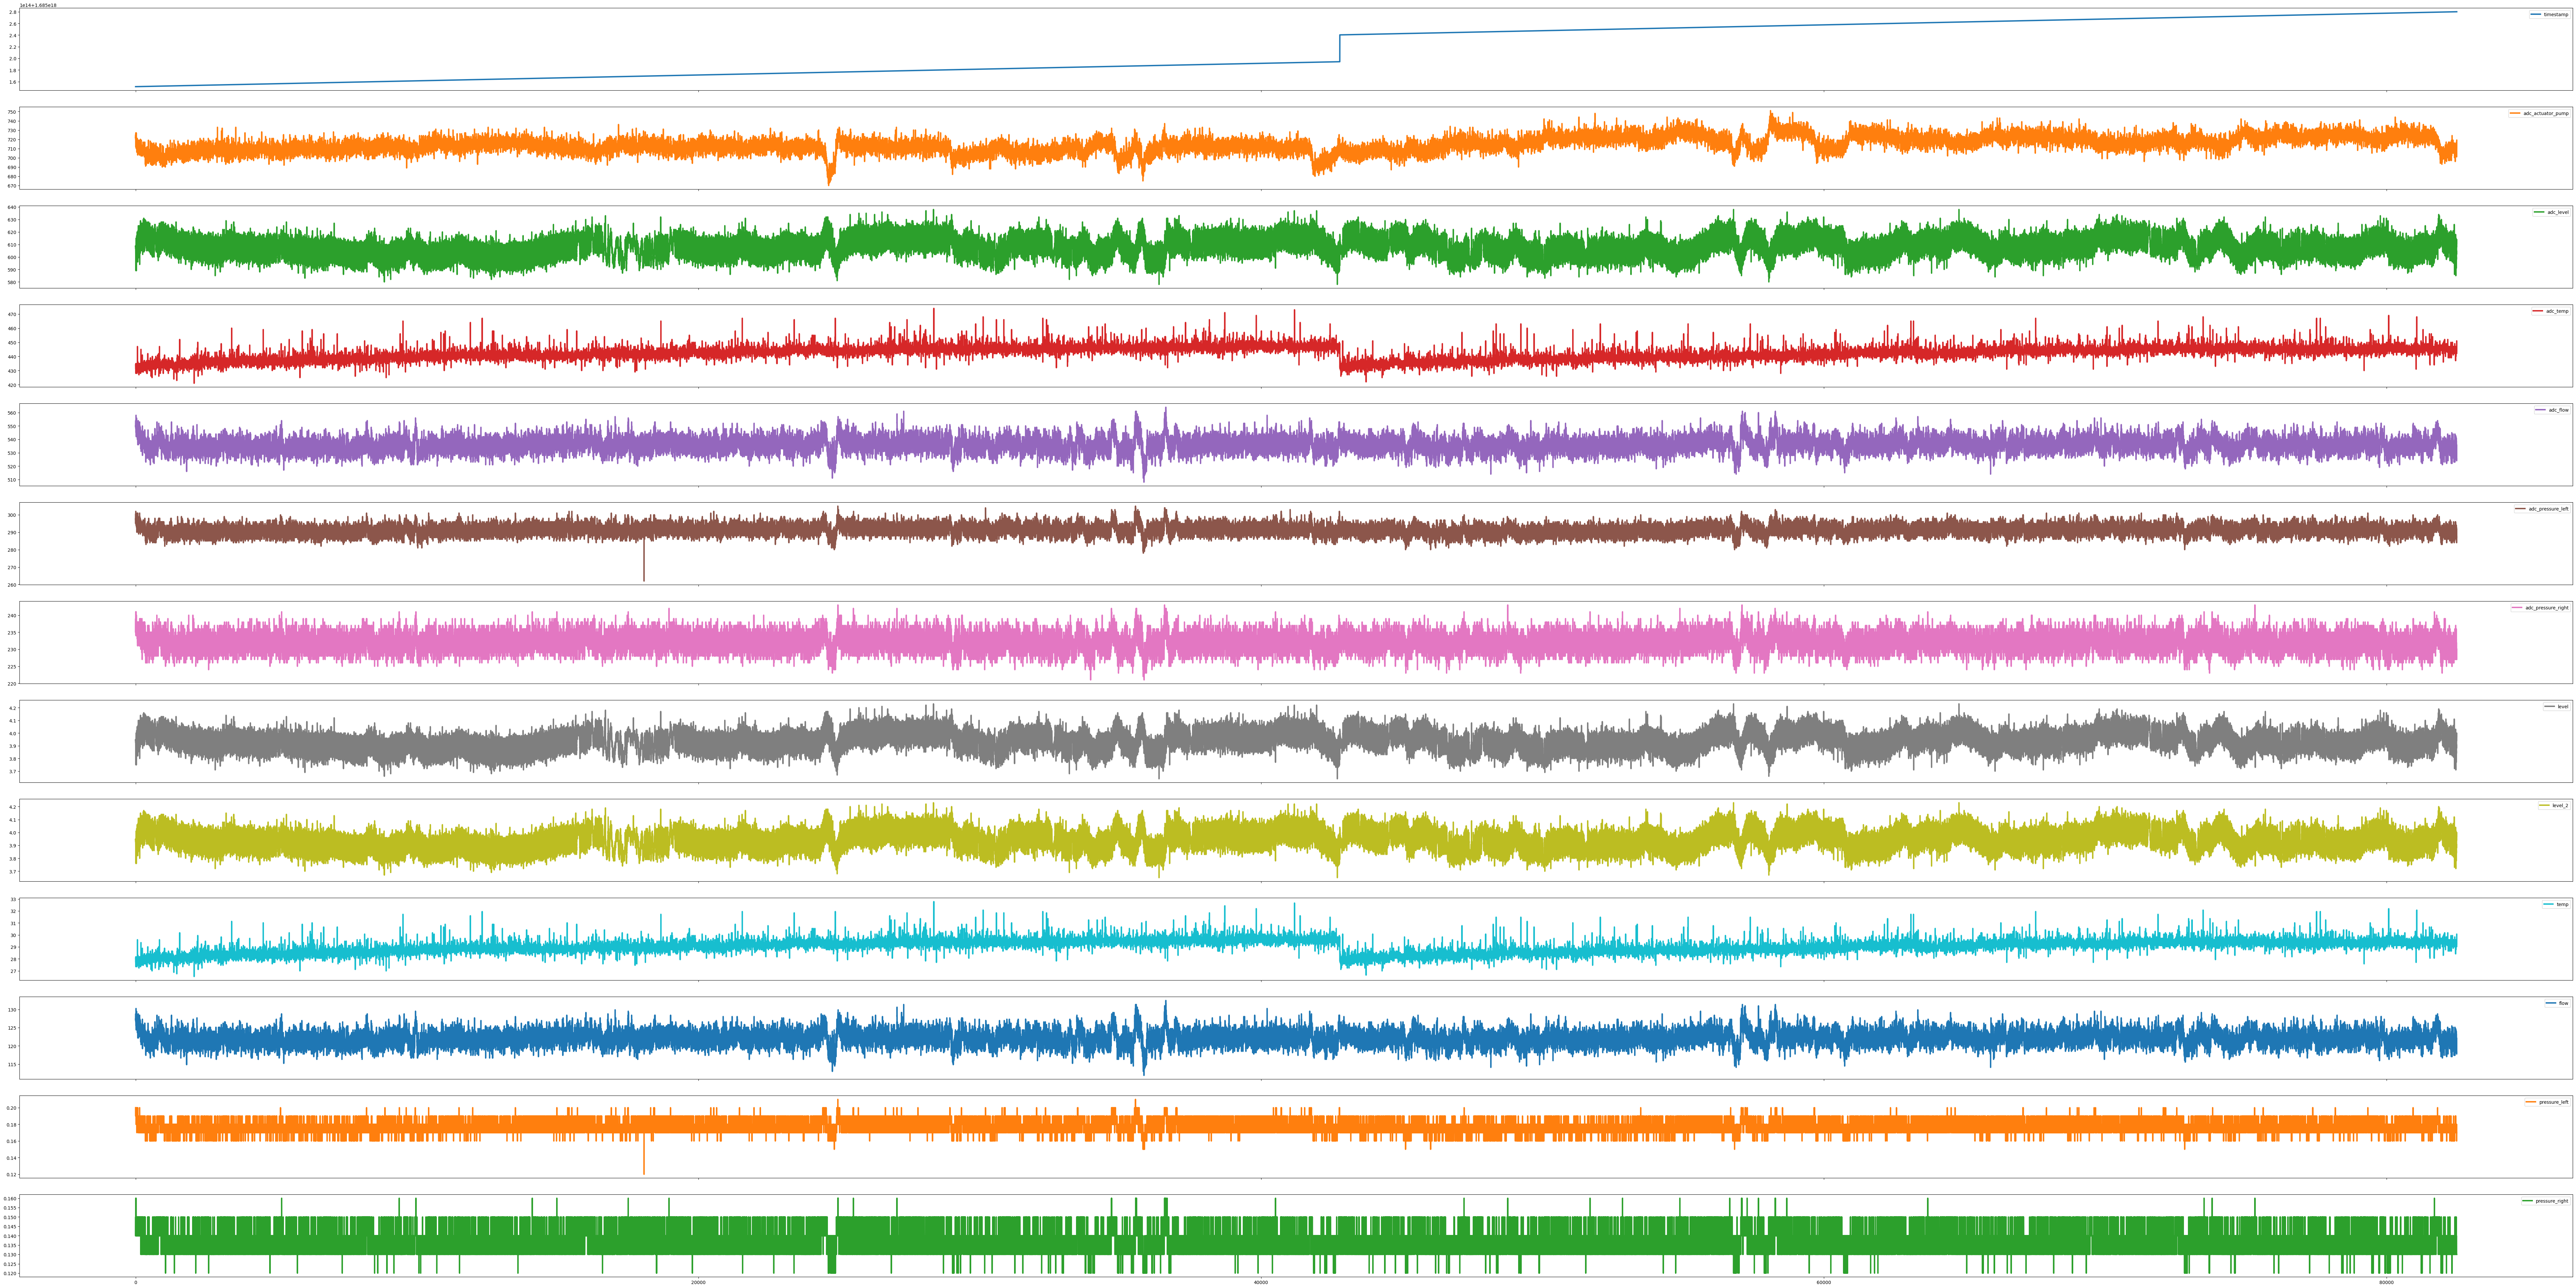

In [7]:
new_df.plot(subplots=True, figsize=(100, 50), linewidth=3)

In [8]:
n = len(new_df)
train_df = new_df[0:int(n*0.8)]
test_df = new_df[int(n*0.8):]

features_considered = []
for column in ["adc_actuator_pump", "adc_level",	"adc_temp",	"adc_flow",	"adc_pressure_left",	"adc_pressure_right"]:
  if column == "adc_temp":
    features_considered.append("adc_temp")
    continue

  ks_result = stats.ks_2samp(train_df[column],test_df[column])
  print(column, ks_result)
  if (ks_result.statistic < 0.2):
    features_considered.append(column)

print(features_considered)

adc_actuator_pump KstestResult(statistic=0.4849848484848485, pvalue=0.0, statistic_location=715.0, statistic_sign=1)
adc_level KstestResult(statistic=0.04424242424242425, pvalue=6.864131460053468e-23, statistic_location=598.0, statistic_sign=1)
adc_flow KstestResult(statistic=0.030893939393939418, pvalue=2.223231129460597e-11, statistic_location=535.0, statistic_sign=1)
adc_pressure_left KstestResult(statistic=0.030393939393939418, pvalue=4.995909700154737e-11, statistic_location=291.0, statistic_sign=1)
adc_pressure_right KstestResult(statistic=0.02072727272727276, pvalue=2.3382363567839924e-05, statistic_location=231.0, statistic_sign=-1)
['adc_level', 'adc_temp', 'adc_flow', 'adc_pressure_left', 'adc_pressure_right']


In [9]:
new_df[features_considered].to_csv("../../dataset/pompa-train-v3.csv", index=False)